In [4]:
from pmdarima.arima import auto_arima
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [5]:
plt.style.use(style="seaborn")
%matplotlib inline

In [14]:
df1 = pd.read_csv("../Datasets/03-01-2019-TO-01-01-2021SBINALLN.csv",delimiter=',',header=None,skiprows=1,names=['Symbol','Series','Date','PrevClose','Open','High','Low','AdjClose','Close','AvegPrice','TotTradQty','TurnoverInLacks','No.ofTrades','DeliverableQty','%DlyQtToTradedQty'])
df2 = df1[df1['Series'].isin(['EQ'])].filter(['Series','Date','Close'])
df2.head()

,Series,Date,Close
0,EQ,03-01-19,291.10
2,EQ,04-01-19,297.65
5,EQ,07-01-19,296.30
7,EQ,08-01-19,305.30
9,EQ,09-01-19,305.30


In [15]:
df2.describe()

,Close
count,496.000000
mean,265.754637
std,60.704868
min,150.850000
25%,197.875000
50%,278.050000
75%,316.787500
max,372.400000


In [18]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df2.Close.dropna())
print(f"ADF Statistic:{result[0]}")
print(f"p-value:{result[1]}")

ADF Statistic:-1.5146621856781026
p-value:0.5262460993071482


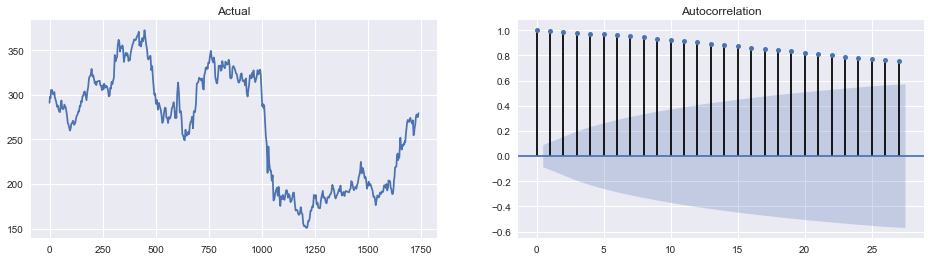

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(df2.Close)
ax1.set_title("Actual")
plot_acf(df2.Close, ax=ax2);


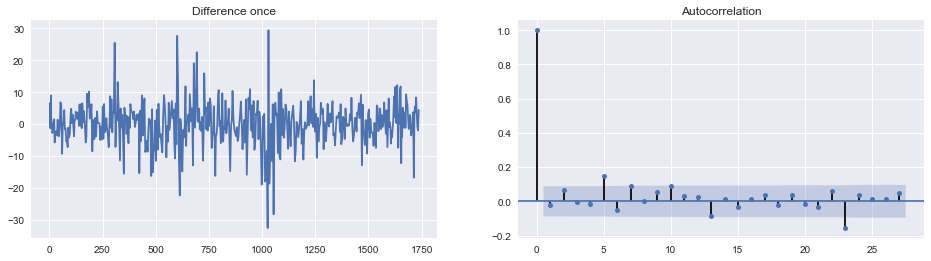

In [31]:
diff = df2.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

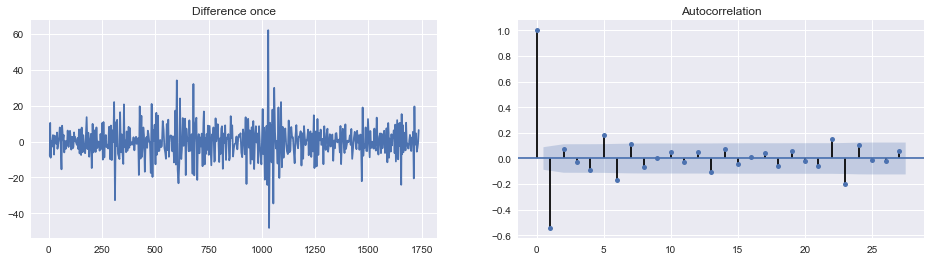

In [36]:
diff = df2.Close.diff().diff().dropna()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

In [38]:
from pmdarima.arima.utils import ndiffs
ndiffs(df2.Close, test="adf")

1

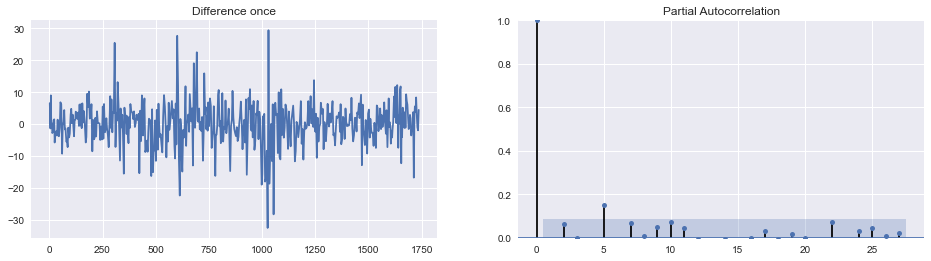

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf
diff = df2.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

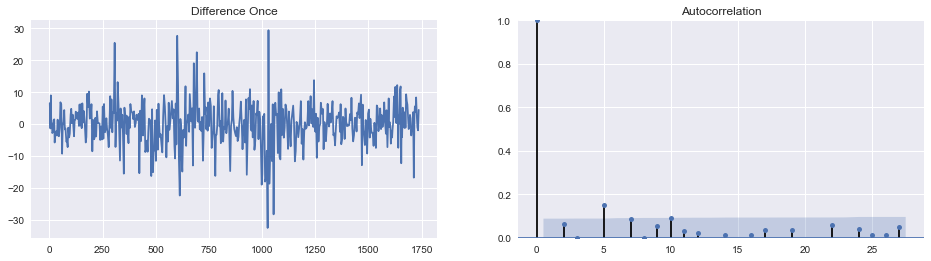

In [43]:
diff = df2.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [46]:
from pmdarima import auto_arima 
auto_arima(df2.Close,d=1)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [80]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df2.Close, order=(5,1,2))
result = model.fit(disp=0)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [48]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  495
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1631.251
Method:                       css-mle   S.D. of innovations              6.530
Date:                Tue, 05 Jan 2021   AIC                           3280.502
Time:                        23:39:37   BIC                           3318.343
Sample:                             1   HQIC                          3295.358
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0059      0.401     -0.015      0.988      -0.791       0.779
ar.L1.D.Close     0.0468      0.190      0.246      0.806      -0.326       0.420
ar.L2.D.Close     0.5083      0.168     

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-29.89839095, -24.04889641, -18.19940187, -12.34990733,
         -6.50041278,  -0.65091824,   5.1985763 ,  11.04807085,
         16.89756539,  22.74705993,  28.59655447]),
 <a list of 495 Lists of Patches objects>)

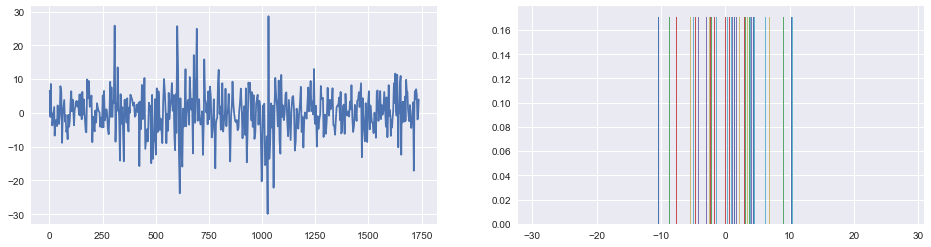

In [50]:
residuals = pd.DataFrame(result.resid)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(residuals)
ax2.hist(residuals, density=True)

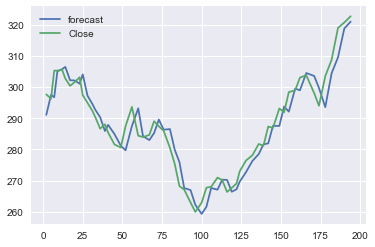

In [79]:
result.plot_predict(
    start=1,
    end=60,
    dynamic=False,
);

In [94]:
model_auto = ARIMA(df2.Close, order=(10,2,5))
result_auto = model_auto.fit(disp=0)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


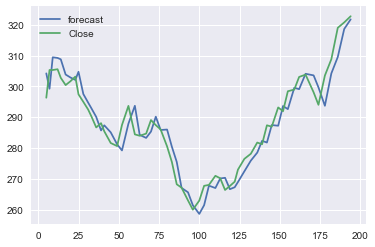

In [98]:
result_auto.plot_predict(end=60,dynamic=False,);

In [99]:
model_auto2 = ARIMA(df2.Close, order=(2,1,2))
result_auto2 = model_auto2.fit(disp=0)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


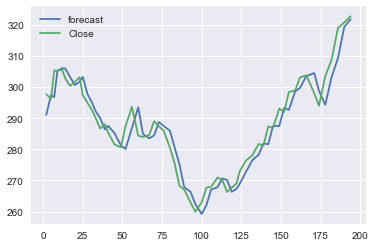

In [100]:
result_auto2.plot_predict(start=1,end=60,dynamic=False,);

In [107]:
n = int(len(df2) * 0.8)
train = df2.Close[:n]
test = df2.Close[n:]


print(len(train))
print(len(test))

396
100


In [130]:
step = 30
model_1 = ARIMA(train, order=(0,1,0))
result_1= model_1.fit(disp=0)
fc, se, conf = result_1.forecast(step)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


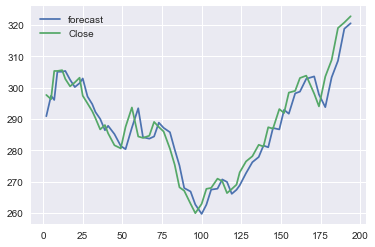

In [125]:
result_1.plot_predict(start=1,end=60,dynamic=False,);

In [126]:
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)

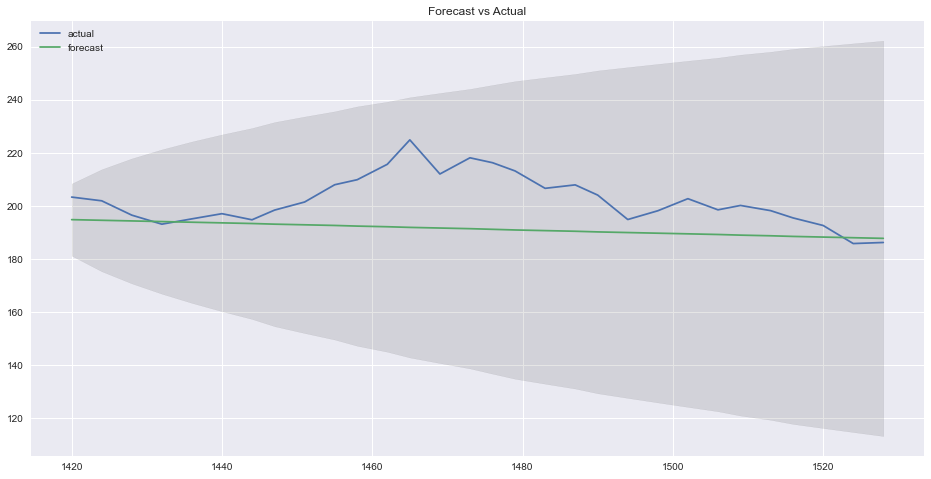

In [127]:
plt.figure(figsize=(16, 8))
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

In [128]:
model = auto_arima(
    df2.Close,
    start_p=1,
    start_q=1,
    test="adf",
    max_p=6,
    max_q=6,
    m=1,  
    d=None,  
    seasonal=False,  
    trace=True,
    stepwise=True,
)

C:\Users\ADMIN\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (3) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3287.004, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3283.705, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3285.489, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3285.514, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3281.711, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.667 seconds
